In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer



In [23]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\datasets\\concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [24]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [25]:
x=df.drop(columns=['Strength'])
y=df['Strength']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Applying Regression without any transformation 

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.6275531792314848

cross checking with cross val score 

In [27]:
np.mean(cross_val_score(lr,x,y,scoring='r2'))

np.float64(0.4609940491662864)

Graphs before applying transformation

<Figure size 1400x400 with 0 Axes>

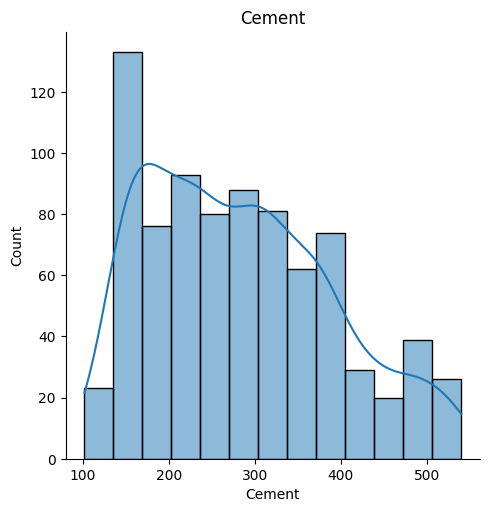

<Figure size 1400x400 with 0 Axes>

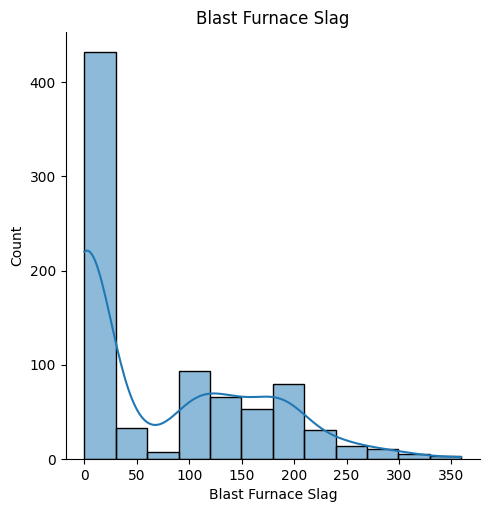

<Figure size 1400x400 with 0 Axes>

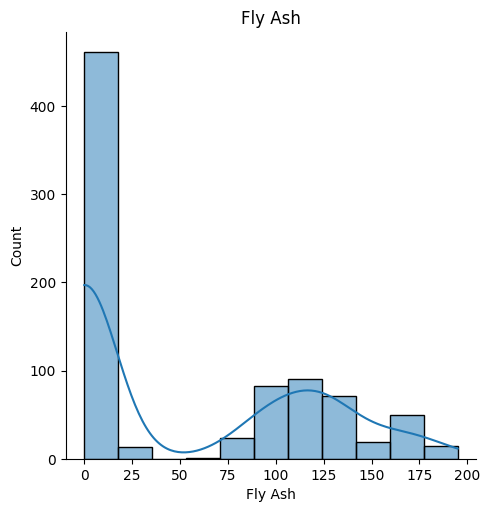

<Figure size 1400x400 with 0 Axes>

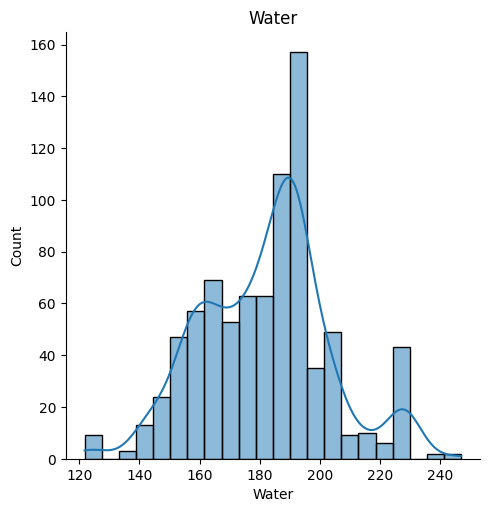

<Figure size 1400x400 with 0 Axes>

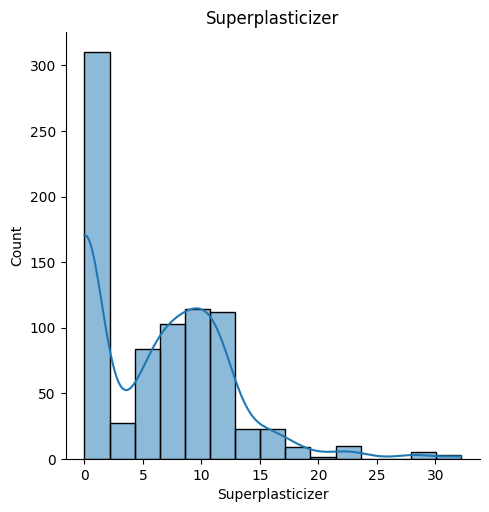

<Figure size 1400x400 with 0 Axes>

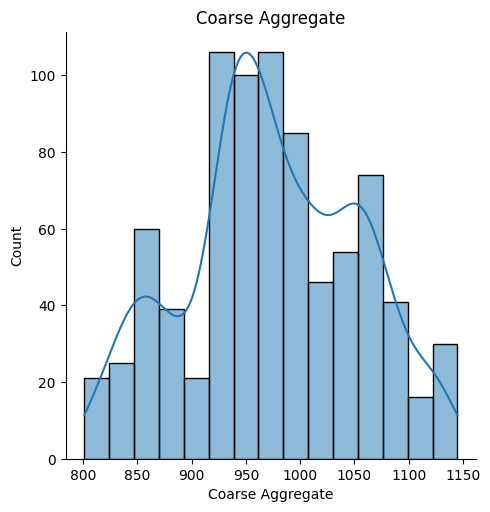

<Figure size 1400x400 with 0 Axes>

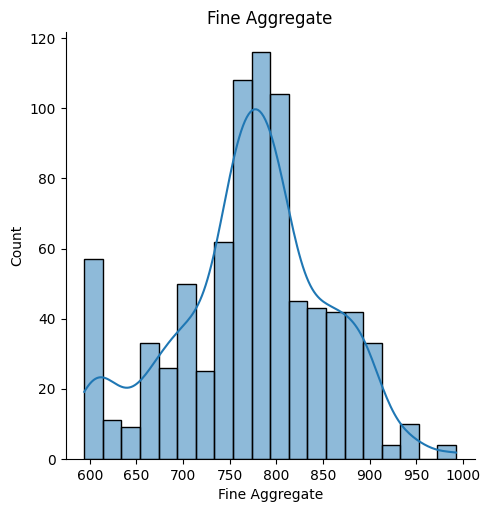

<Figure size 1400x400 with 0 Axes>

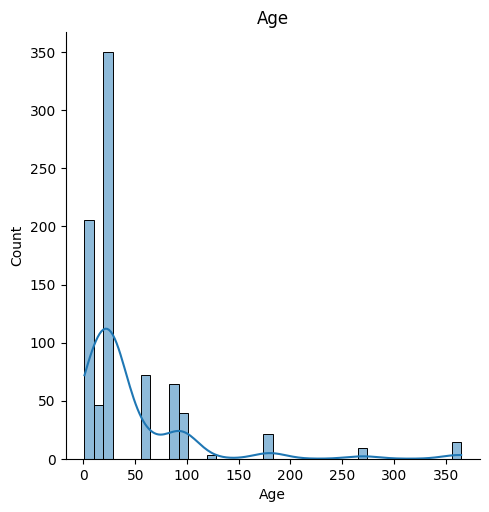

In [ ]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    sns.displot(x_train[col],kde=True)
    plt.title(col)
    plt.show()